In [1]:
import sys
sys.path.insert(0, r'../../../quetzal')

from quetzal.io import  gtfs_importer
from quetzal.model import stepmodel
% matplotlib inline

In [2]:
training_folder = '../../'

In [3]:
sm = stepmodel.read_zip(training_folder + r'model/preparation/road_model.zip')
#sm = stepmodel.read_hdf(training_folder + 'model/merged_after.hdf')

read_hdf: : 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 23.99it/s]


In [4]:
#sm.road_links.reset_index(inplace=True, drop=True)

In [5]:
sm.road_links[['a', 'b']] = sm.road_links[['a', 'b']].astype(str)
sm.links = sm.links.loc[sm.links['route_type'] == 3]

In [6]:
sm.links

,a,agency_id,arrival_time,b,departure_time,direction_id,geometry,index,link_sequence,road_a,...,route_id,route_long_name,route_short_name,route_text_color,route_type,service_id,time,trip_headsign,trip_id,trip_short_name
link_0,node_2090,100,1500.0,node_2091,1200.0,0,LINESTRING (651764.0976909284 6865231.91178069...,0,1,94236061,...,323511,FUN (FUNICULAIRE) - Aller,FUNICULAIRE,0,3,1388795,300.0,81809,10003887950313949,81809
link_1,node_2552,100,1500.0,node_2551,1200.0,1,LINESTRING (651764.0976909284 6865231.91178069...,1,1,94236061,...,323512,FUN (FUNICULAIRE) - Retour,FUNICULAIRE,0,3,1388795,300.0,81811,10003887950313951,81811
link_20,node_3764604,100,76680.0,node_3764606,76560.0,0,LINESTRING (652765.9037112941 6864610.05527833...,20,1,94181307,...,1927078,(GARE DU NORD <-> PORTE D'ORLEANS) - Aller,38,0,3,2639389,120.0,None,10026393891806569,100
link_21,node_3764606,100,76860.0,node_3764607,76680.0,0,LINESTRING (652764.3231883385 6864601.51681011...,21,2,5297531445,...,1927078,(GARE DU NORD <-> PORTE D'ORLEANS) - Aller,38,0,3,2639389,180.0,None,10026393891806569,100
link_22,node_3764607,100,76980.0,node_3764609,76860.0,0,LINESTRING (652869.1170082836 6864220.34497048...,22,3,94201292,...,1927078,(GARE DU NORD <-> PORTE D'ORLEANS) - Aller,38,0,3,2639389,120.0,None,10026393891806569,100
link_23,node_3764609,100,77100.0,node_3764610,76980.0,0,LINESTRING (652955.5855308739 6864000.67690370...,23,4,169315420,...,1927078,(GARE DU NORD <-> PORTE D'ORLEANS) - Aller,38,0,3,2639389,120.0,None,10026393891806569,100
link_24,node_3764610,100,77220.0,node_3764611,77100.0,0,"LINESTRING (652845.4482151483 6863718.6232901,...",24,5,123256917,...,1927078,(GARE DU NORD <-> PORTE D'ORLEANS) - Aller,38,0,3,2639389,120.0,None,10026393891806569,100
link_25,node_3764611,100,77340.0,node_3764612,77220.0,0,LINESTRING (652714.0409220739 6863371.84964568...,25,6,175026494,...,1927078,(GARE DU NORD <-> PORTE D'ORLEANS) - Aller,38,0,3,2639389,120.0,None,10026393891806569,100
link_26,node_3764612,100,77400.0,node_3764613,77340.0,0,LINESTRING (652592.4553992018 6863076.96304648...,26,7,470203,...,1927078,(GARE DU NORD <-> PORTE D'ORLEANS) - Aller,38,0,3,2639389,60.0,None,10026393891806569,100
link_27,node_3764613,100,77520.0,node_3764614,77400.0,0,LINESTRING (652627.3930009791 6862715.69024645...,27,8,361075,...,1927078,(GARE DU NORD <-> PORTE D'ORLEANS) - Aller,38,0,3,2639389,120.0,None,10026393891806569,100


In [7]:
lines = sm.get_lines_with_offset(width=0.3)

100%|█████████████████████████████████████████████████████████████████████████████| 1368/1368 [00:08<00:00, 156.47it/s]


In [9]:
lines['geometry'] = lines['geometry'].apply(lambda g: g.simplify(10))

In [10]:
sm.lines['color'] = list([
    '#a6cee3','#1f78b4','#b2df8a',
    '#33a02c','#fb9a99','#e31a1c',
    '#fdbf6f','#ff7f00','#cab2d6',
    '#6a3d9a','#ffff99','#b15928'
] * 1000)[:len(sm.lines)]

In [11]:
sm.lines

,trip_id,agency_id,direction_id,route_color,route_id,route_long_name,route_short_name,route_text_color,route_type,service_id,trip_headsign,trip_short_name,geometry,color
0,10026393891806569,100,0,#A00037,1927078,(GARE DU NORD <-> PORTE D'ORLEANS) - Aller,38,0,3,2639389,None,100,LINESTRING (652765.9037112941 6864610.05527833...,#a6cee3
1,10026504891272206,100,0,#647D6E,1927416,(TERROIRS DE FRANCE <-> LIBERTE-CHANZY) - Aller,109,0,3,2650489,None,100,LINESTRING (655038.9632061212 6859217.13750126...,#1f78b4
2,10026504891272210,100,1,#5A7382,1927417,(TERROIRS DE FRANCE <-> LIBERTE-CHANZY) - Retour,109,0,3,2650489,None,100,LINESTRING (655390.8323139658 6858695.46912176...,#b2df8a
3,10026519781320591,100,0,#91A564,1927104,(HOTEL DE VILLE DE PARIS <-> RADIO FRANCE) - A...,70,0,3,12651978,None,100,LINESTRING (652284.5295439812 6862197.00238786...,#33a02c
4,10026524920894570,100,0,#64411E,1927110,(GARE MONTPARNASSE <-> PORTE DE CHAMPERRET) - ...,92,0,3,12652492,None,100,LINESTRING (650126.767462901 6860452.179546185...,#fb9a99
5,10026603231398394,100,0,#559BB4,1927004,(GAMBETTA <-> CHAMPS DE MARS) - Aller,69,0,3,2660323,None,100,LINESTRING (655850.1017493762 6862932.47931527...,#e31a1c
6,10026603231398395,100,1,#91A564,1927005,(GAMBETTA <-> CHAMPS DE MARS) - Retour,69,0,3,2660323,None,100,"LINESTRING (648371.03003988 6861879.388725985,...",#fdbf6f
7,10026724701801997,100,1,#647D6E,1927361,(OPERA <-> CLICHY - VICTOR HUGO) - Retour,66,0,3,12672470,None,100,LINESTRING (650295.2945783043 6866915.35537886...,#ff7f00
8,10027192421734492,100,1,#D22328,1927575,(PORTE DE CLICHY <-> GARE SAINT-LAZARE) - Retour,528,0,3,2719242,None,100,LINESTRING (650352.1717595602 6864343.72459035...,#cab2d6
9,10027192421734493,100,0,#643C5A,1927574,(PORTE DE CLICHY <-> GARE SAINT-LAZARE) - Aller,528,0,3,2719242,None,100,LINESTRING (649539.1836199556 6866171.87529187...,#6a3d9a


In [12]:
import pandas as pd
clines = pd.merge(
    lines,
    sm.lines[['trip_id', 'color']],
    left_on='id',
    right_on='trip_id'
)

In [13]:
clines

,geometry,width,side,offset,id,trip_id,color
0,LINESTRING (643441.7928975719 6862675.73630315...,0.3,0,0.15,1026897751078677,1026897751078677,#cab2d6
1,LINESTRING (643835.2261959255 6863045.08759776...,0.3,1,0.45,1026897751078677,1026897751078677,#cab2d6
2,LINESTRING (643841.9620434496 6863055.77543577...,0.3,0,0.15,1026897751078677,1026897751078677,#cab2d6
3,LINESTRING (644160.9475537294 6862883.86641000...,0.3,0,0.15,1026897751078677,1026897751078677,#cab2d6
4,LINESTRING (644367.4625101662 6861183.67635245...,0.3,1,0.45,1026897751078677,1026897751078677,#cab2d6
5,LINESTRING (644376.9924362464 6861190.97961716...,0.3,3,1.05,1026897751078677,1026897751078677,#cab2d6
6,LINESTRING (644394.1144473938 6861200.20050339...,0.3,0,0.15,1026897751078677,1026897751078677,#cab2d6
7,LINESTRING (644596.9522701238 6862323.57713731...,0.3,0,0.15,1026897751078677,1026897751078677,#cab2d6
8,LINESTRING (645498.1708824574 6861140.92761065...,0.3,2,0.75,1026897751078677,1026897751078677,#cab2d6
9,LINESTRING (643441.7928975719 6862675.73630315...,0.3,0,0.15,1026897751078676,1026897751078676,#ff7f00


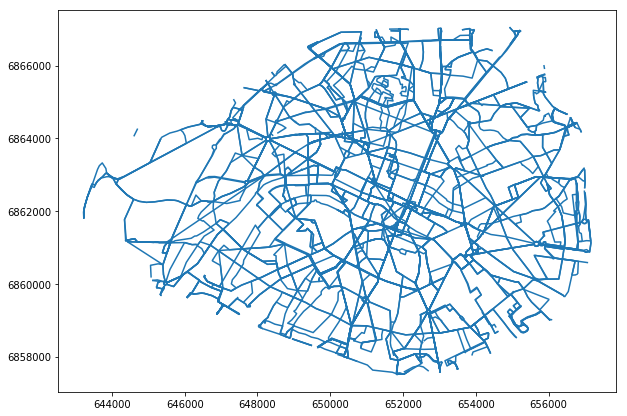

In [70]:
import geopandas as gpd
gpd.GeoDataFrame(clines).plot(figsize=[10, 10])

In [71]:
import os

def to_file(gdf, file):
    try:
        os.remove(file)
    except FileNotFoundError:
        pass
    gdf.to_file(file, driver="GeoJSON")

In [72]:
to_file(clines, training_folder + 'model/latest/clines.geojson' )